<a href="https://colab.research.google.com/github/trjgdyan/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama        : Tri Jagad Ariyani**

**NIM/Absen   : 2141720049**

**Kelas       : 3C-TI**

**Mata Kuliah : PCVK**

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# **Transformai Linier Brightness**

 Mengubah tingkat kecerahan citra 
Masukkan nilai kecerahan: 50


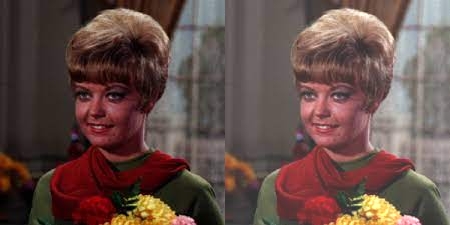

In [106]:
print(' Mengubah tingkat kecerahan citra ')
print('==================================')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/images/cewek.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut

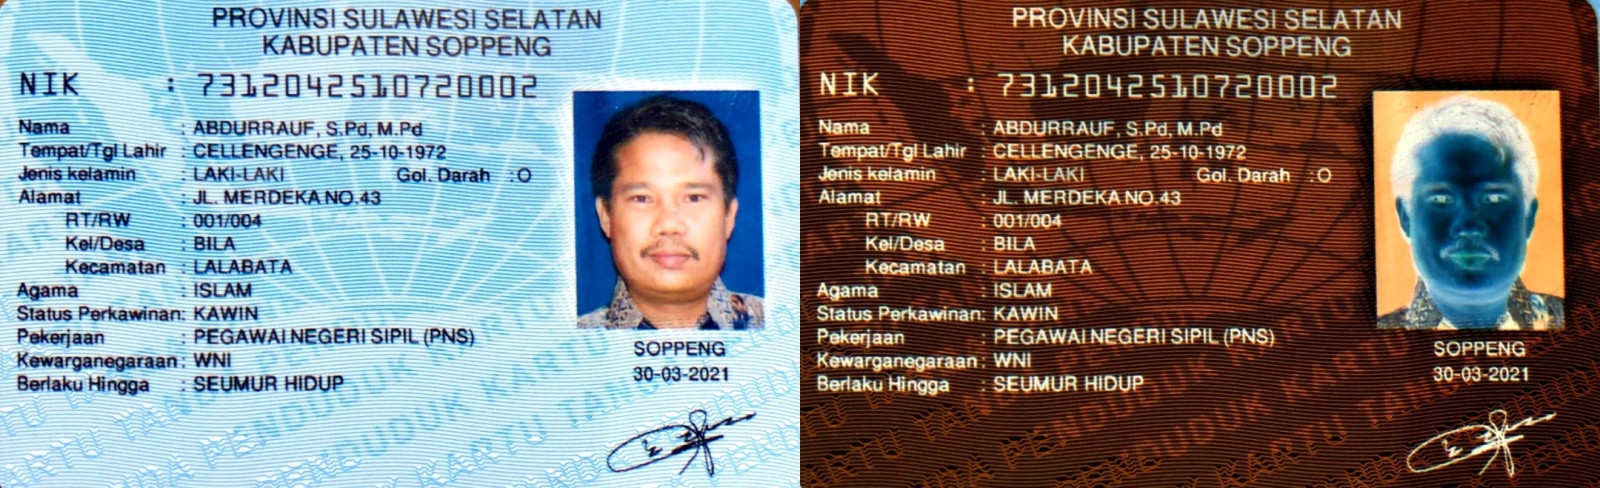

In [88]:
#INVERSE CITRA

original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp1.jpeg')

# menyimpan hasil inversi
inverse_image = np.zeros(original.shape, original.dtype)

# Inversi citra dengan perulangan
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            new_value = 255 - original[y, x, c]
            inverse_image[y, x, c] = max(new_value, 0)

final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


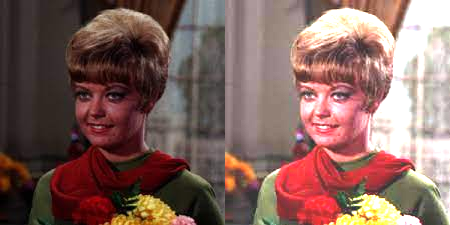

In [107]:
#TRANSFORMASI CONTRAST
try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/cewek.jpeg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:


Masukkan nilai kecerahan:50


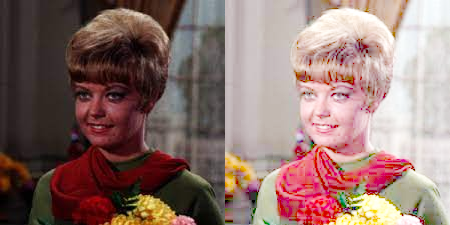

In [108]:
#TRANSFORMASI LOGARITHMIC
try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/cewek.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. Averaging

b. Lightness

c. Luminance

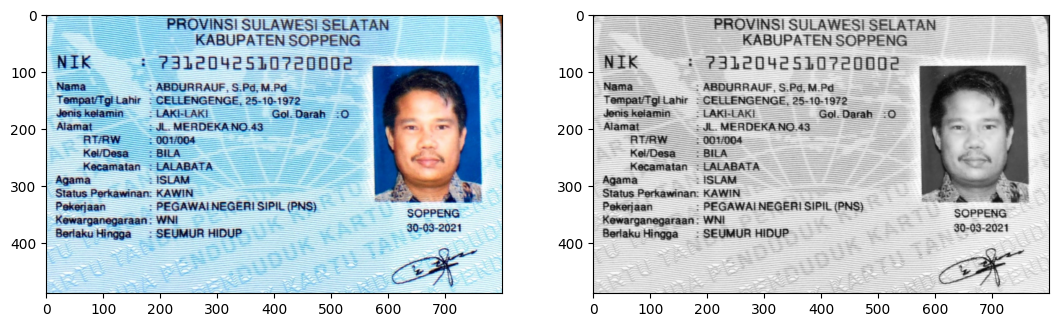

In [90]:
# a. Averaging
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp1.jpeg')
average_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      average_image[y,x,c] = np.clip(np.mean(original[y,x]), 0, 255)

plt.figure(figsize=(20, 10))
plt.subplot(131), plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.subplot(132), plt.imshow(cv.cvtColor(average_image, cv.COLOR_BGR2RGB))
plt.show()

<ipython-input-92-c282a6a15430>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  average_image[y,x,c] = np.clip(((max+min)/2), 0, 255)


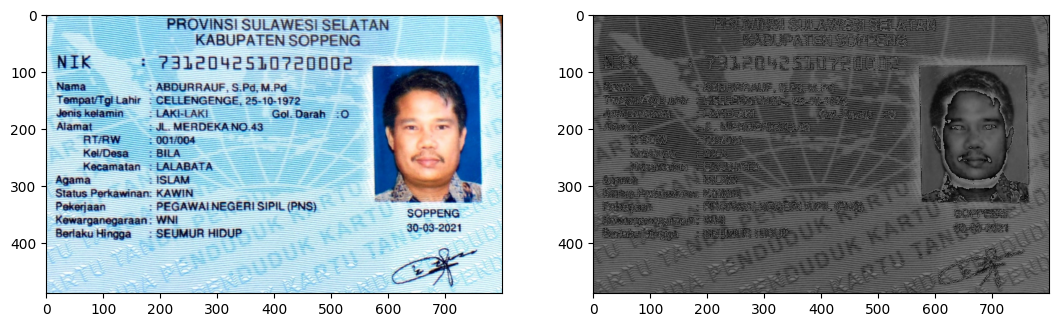

In [92]:
# b. Lightness
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp1.jpeg')
average_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      max = np.max(original[y,x])
      min = np.min(original[y,x])
      average_image[y,x,c] = np.clip(((max+min)/2), 0, 255)

plt.figure(figsize=(20, 10))
plt.subplot(131), plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.subplot(132), plt.imshow(cv.cvtColor(average_image, cv.COLOR_BGR2RGB))
plt.show()

Text(0.5, 1.0, 'Hasil Luminance')

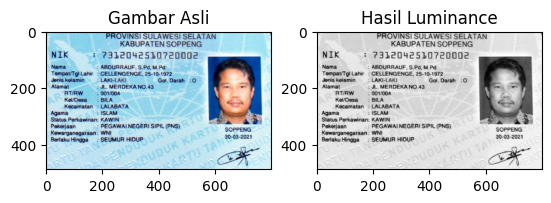

In [110]:
#C. Luminance
img_lum = cv.imread('/content/drive/MyDrive/PCVK/images/ktp1.jpeg')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[0].set_title("Gambar Asli")
ax[1].imshow(gray_img_lum, cmap = 'gray')
ax[1].set_title("Hasil Luminance")

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

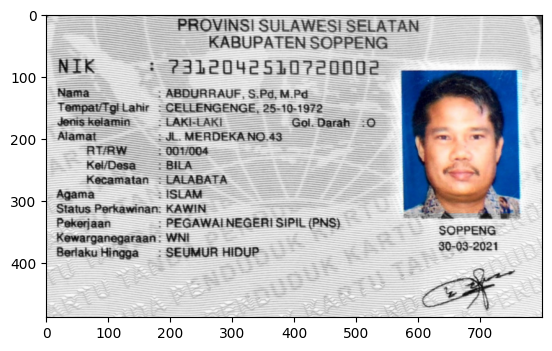

In [115]:
image = cv2.imread('/content/drive/MyDrive/PCVK/images/ktp1.jpeg')

# menentukan koordinat sudut kiri atas dan kanan bawah dari area yang akan dikecualikan dari grayscale
x1, y1 = 570, 90  # Koordinat sudut kiri atas
x2, y2 = 767, 320  # Koordinat sudut kanan bawah

# Salin citra asli ke citra hasil
result_image = image.copy()

# Loop melalui setiap piksel dalam citra
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        # Periksa apakah piksel berada di dalam area yang akan dikecualikan
        if x1 <= x <= x2 and y1 <= y <= y2:
            # Jika dalam area yang akan dikecualikan, salin warna asli dari citra asli
            result_image[y, x] = image[y, x]
        else:
            # Jika di luar area yang akan dikecualikan, konversi piksel menjadi grayscale
            gray_value = np.mean(image[y, x])
            result_image[y, x] = [gray_value, gray_value, gray_value]  # Jadikan piksel menjadi grayscale

# Tampilkan citra hasil dengan menggunakan matplotlib
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))

plt.show()

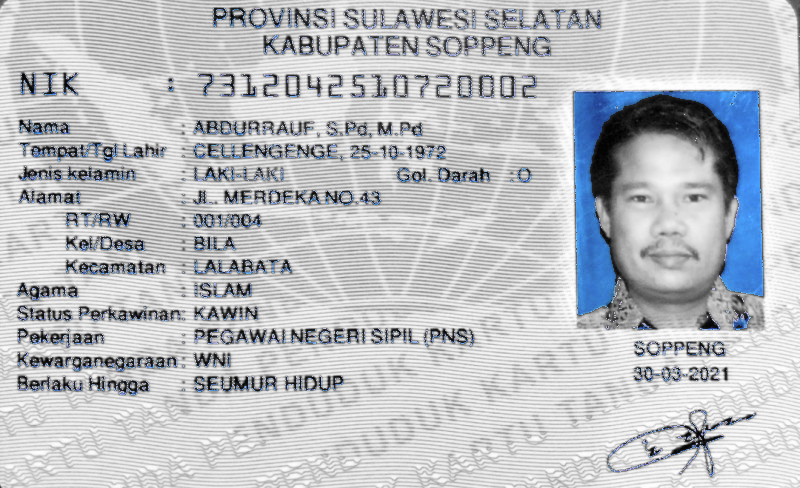

In [99]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/images/ktp1.jpeg')

# menentukan rentang warna biru
lower_blue = np.array([100, 0, 0])
upper_blue = np.array([255, 100, 100])

# membuat mask_blue untuk piksel
mask_blue = cv.inRange(ktp, lower_blue, upper_blue)

# mengubah piksel biru menjadi abu-abu
blue_pixels = cv.bitwise_and(ktp, ktp, mask=mask_blue)

# mengubah sisa gambar menjadi abu-abu
gray_mask = cv.cvtColor(cv.bitwise_not(mask_blue), cv.COLOR_GRAY2BGR)
gray_image = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
gray_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# menggabungkan piksel biru dan wilayah skala abu-abu
result_image = cv.add(gray_image, blue_pixels)
cv2_imshow(result_image)